<a href="https://colab.research.google.com/github/RaghavendraKuratti/ImageClassification/blob/main/ImageClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test,y_test) = cifar10.load_data()
# print(type(x_train))
index = 0
# plt.imshow(x_train[index])
# plt.show()

classification = ['airoplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# print(classification[y_train[index][0]])
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
# print(y_train_one_hot)

x_train = x_train / 255
x_test = x_test / 255
print("model Loading started")
model = Sequential()
model.add(Conv2D(32, (5, 5),activation='relu',input_shape=(32,32,3)))
# model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5),activation='relu'))
# model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam',
          loss="categorical_crossentropy",
          metrics=['accuracy'])

hist = model.fit(x_train, y_train_one_hot,
				batch_size = 256,
				epochs = 10,
				validation_split = 0.2)

model Loading started
Epoch 1/10
157/157 [==============================] - 60s 381ms/step - loss: 2.0000 - accuracy: 0.2408 - val_loss: 1.5579 - val_accuracy: 0.4224
Epoch 2/10
157/157 [==============================] - 63s 401ms/step - loss: 1.4861 - accuracy: 0.4488 - val_loss: 1.3868 - val_accuracy: 0.5000
Epoch 3/10
157/157 [==============================] - 59s 377ms/step - loss: 1.3333 - accuracy: 0.5174 - val_loss: 1.2248 - val_accuracy: 0.5658
Epoch 4/10
157/157 [==============================] - 59s 377ms/step - loss: 1.2164 - accuracy: 0.5634 - val_loss: 1.1437 - val_accuracy: 0.5988
Epoch 5/10
157/157 [==============================] - 59s 379ms/step - loss: 1.1142 - accuracy: 0.6035 - val_loss: 1.1085 - val_accuracy: 0.6061
Epoch 6/10
157/157 [==============================] - 59s 378ms/step - loss: 1.0306 - accuracy: 0.6342 - val_loss: 1.0308 - val_accuracy: 0.6377
Epoch 7/10
157/157 [==============================] - 59s 377ms/step - loss: 0.9659 - accuracy: 0.6573 - val

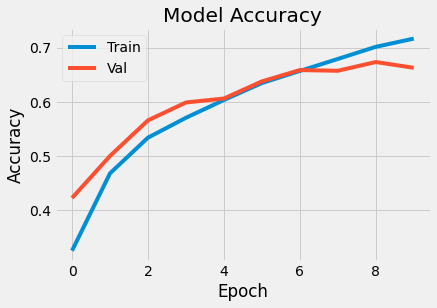

In [4]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Val'],loc='upper left')
plt.show()

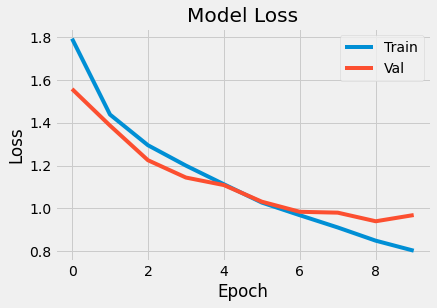

In [6]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(['Train','Val'],loc='upper right')
plt.show()

In [8]:
from google.colab import files
uploaded = files.upload()

Saving cat.jpg to cat.jpg


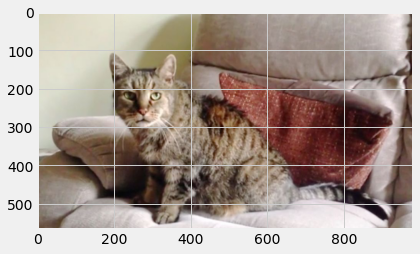

In [9]:
new_img = plt.imread('cat.jpg')

img = plt.imshow(new_img)

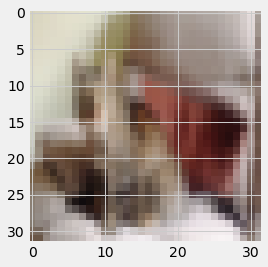

In [10]:
from skimage.transform import resize
resized_img = resize(new_img, (32,32,3))
img = plt.imshow(resized_img)

In [11]:
prediction = model.predict(np.array([resized_img]))
prediction

array([[3.8502688e-04, 2.8565325e-04, 1.3990613e-02, 6.4769936e-01,
        2.1247260e-02, 2.4233122e-01, 6.8249665e-02, 4.2819479e-03,
        5.6670519e-04, 9.6263090e-04]], dtype=float32)

In [12]:
list_index = [0,1,2,3,4,5,6,7,8,9]
x = prediction
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

list_index

[3, 5, 6, 4, 2, 7, 9, 8, 0, 1]

In [15]:
print(classification[list_index[0]], ':', round(prediction[0][list_index[0]] * 100), '%')

cat : 65 %
